## Name: Pritam Padhan, roll no.: MDS202339

# Report
Our objective is to cluster documents from the {Enron email, NIPS, KOS collections} using K-means clustering with varying values of K, aiming to determine the optimal K value.

We have developed custom functions, namely jaccard_dist(), jaccard_k_means(), and inertia(), to facilitate clustering.

* The jaccard_dist(list1, list2) function calculates the dissimilarity between two document lists, employing the formula 1 * ((|list1 ∩ list2|)/(|list1 ∪ list2|)). A jaccard_dist(list1, list2) value close to 0 indicates similarity between list1 and list2, while a value close to 1 indicates dissimilarity.

* The jaccard_k_means(X, no_of_clusters, max_iter=300) function takes the dataset X, the number of clusters (k), and a maximum iteration value as inputs, and performs clustering, providing k centroids and labels for each data point. Here, labels[i] = j indicates that the ith data point is in the jth cluster, with centroid centroids[j].

* The inertia(X, centroids, labels) function calculates the sum of jaccard distances between each data point and its assigned cluster.

After defining these necessary functions, we conduct K-means clustering on the Enron email, NIPS, and KOS text collections for various values of k. Subsequently, we plot elbow curves and select the optimal k based on the point where the decrease in inertia appears to flatten out. Note that the randomness in the selection of initial centroids for each k value may affect the clarity of the deflection in the plots.
### Time taken by the first and second elbow_plot function to run for the data sets NIPS and KOS blogs is around 2 to 5 minutes.
### Time taken by the third elbow_plot function to run for the data set enron emails is around 1 hour and 30 minutes since it's a massive data collection.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Jaccard Distance between two arrays
def jaccard_dist(list1, list2):
    intersection = np.minimum(list1, list2).sum()
    union = np.maximum(list1, list2).sum()
    return 1 - (intersection / union)

In [2]:
# Function to perform K-means clustering
def jaccard_k_means(X, no_of_clusters, max_iter=300):
    D, W = X.shape
    k = no_of_clusters
    
    # Initialize centroids randomly
    random_integers = np.random.choice(D, size=k, replace=False)
    centroids = X[random_integers]
    
    for _ in range(max_iter):
        # Precompute distances between data points and centroids to reduce computational time
        distances = np.zeros((D, k))
        for j in range(k):
            distances[:, j] = np.array([jaccard_dist(X[i], centroids[j]) for i in range(D)])
        
        # Assign labels based on minimum distance from centroids
        labels = np.argmin(distances, axis=1)
        
        # Update centroids based on labels
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(new_centroids == centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

In [3]:
# Function to compute inertia for a given no_of_centroids
def inertia(X, centroids, labels):
    inertia_val = 0
    for i, centroid in enumerate(centroids):
        inertia_val += np.sum([jaccard_dist(x, centroid) for x in X[labels == i]])
    return inertia_val

In [4]:
# Function to plot elbow curve and return inertias
def elbow_plot(X, max_clusters=10, max_iter=300):
    inertias = []
    k_values = range(1, max_clusters + 1)
    for k in k_values:
        centroids, labels = jaccard_k_means(X, k, max_iter)
        inertias.append(inertia(X, centroids, labels))

    plt.figure(figsize=(8, 4))
    plt.plot(k_values, inertias, marker='o', linestyle='-')
    plt.title('Elbow Curve for K-means Clustering')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    return inertias

# NIPS blog entries collection

In [6]:
# reading the text file and converting them into numpy arrays C:/Users/padha/Documents/janApril2024/DMML/bag_of_words
with open('C:/Users/padha/Documents/janApril2024/DMML/bag_of_words/docword.nips.txt', 'r') as file:
    lines = file.readlines()

D, W, NNZ = map(int, lines[:3])
nips_points = np.zeros((D, W), dtype=int)
for line in lines[3:]:
    docID, wordID, count = map(int, line.strip().split())
    nips_points[docID - 1, wordID - 1] = count

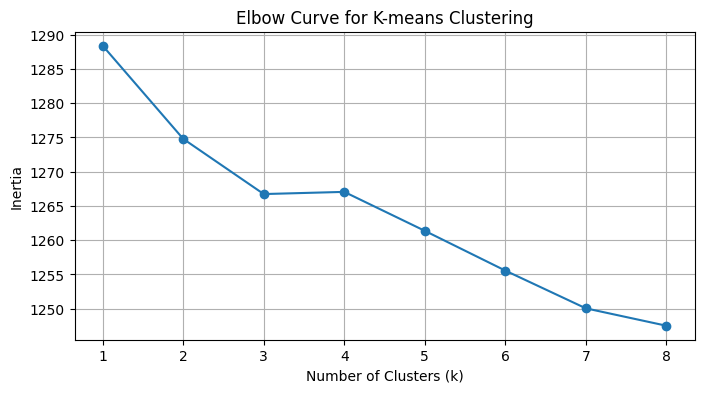

Inertias: [1288.3886798341096, 1274.788362329141, 1266.7317177799728, 1267.0505050101738, 1261.363873318036, 1255.5576350274414, 1250.0488504069845, 1247.5091618843992]


In [7]:
inertias = elbow_plot(nips_points, max_clusters=8, max_iter=300)
print("Inertias:", inertias)

In [8]:
print('Optimal value of k seems to be 5 for this collection')

Optimal value of k seems to be 5 for this collection


# KOS blog entries collection

In [10]:
# reading the text file and converting them into numpy arrays
with open('C:/Users/padha/Documents/janApril2024/DMML/bag_of_words/docword.kos.txt', 'r') as file:
    lines = file.readlines()

D, W, NNZ = map(int, lines[:3])
kos_points = np.zeros((D, W), dtype=int)
for line in lines[3:]:
    docID, wordID, count = map(int, line.strip().split())
    kos_points[docID - 1, wordID - 1] = count

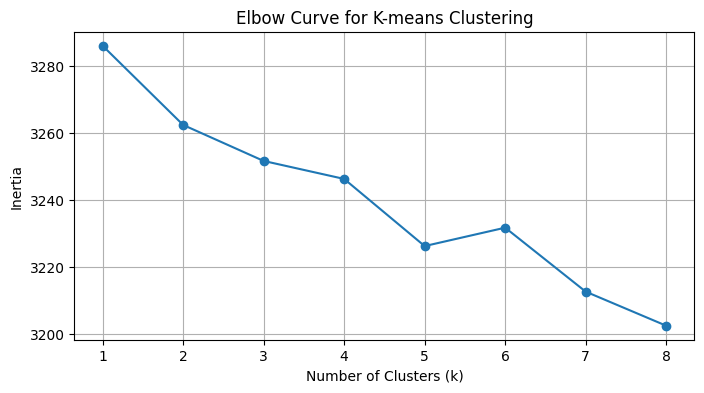

Inertias: [3285.9152264303575, 3262.304658741635, 3251.5694503890622, 3246.20556046787, 3226.1883141557737, 3231.6760153108726, 3212.6027522503705, 3202.4457626257595]


In [11]:
inertias = elbow_plot(kos_points, max_clusters=8, max_iter=300)
print("Inertias:", inertias)

In [ ]:
print('Optimal value of k seems to be 6 for this collection')

# Enron emails collection

In [ ]:
# reading the text file and converting them into numpy arrays
with open('C:/Users/padha/Documents/janApril2024/DMML/bag_of_words/docword.enron.txt', 'r') as file:
    lines = file.readlines()

D, W, NNZ = map(int, lines[:3])
enron_points = np.zeros((D, W), dtype=int)
for line in lines[3:]:
    docID, wordID, count = map(int, line.strip().split())
    enron_points[docID - 1, wordID - 1] = count

In [ ]:
# Function to plot elbow curve and return inertias
def elbow_plot_enron(X, start = 1, end = 10, max_iter=100):
    inertias = []
    k_values = range(start, end + 1)
    for k in k_values:
        centroids, labels = jaccard_k_means(X, k, max_iter)
        inertias.append(inertia(X, centroids, labels))

    plt.figure(figsize=(8, 4))
    plt.plot(k_values, inertias, marker='o', linestyle='-')
    plt.title('Elbow Curve for K-means Clustering')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    return inertias

In [ ]:
%%time
inertias = elbow_plot_enron(enron_points, start = 3, end = 8, max_iter=100) #reducing the total iterations and the range of k values because this data set is too large
print("Inertias:", inertias)

In [ ]:
print('Optimal value of k seems to be 5 or 6 for this collection')

## Note: in some plots, the value of inertia increases for decreasing k values due to the random selection of initial centroids for each k value